# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


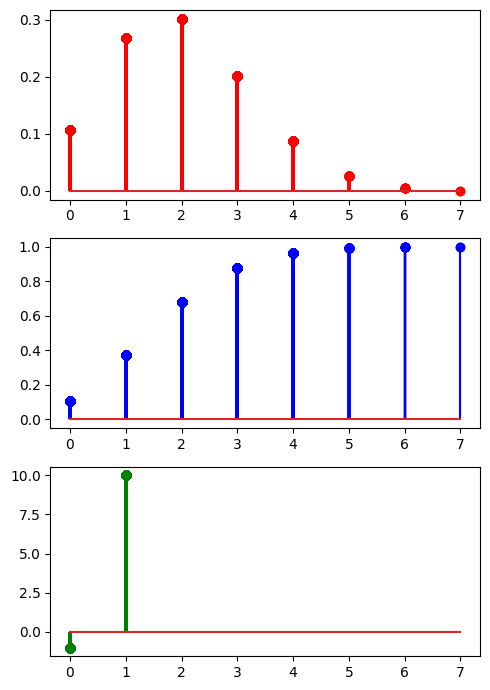

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

## Normal Distribution

In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculates PDF related to this distribution

def dnorm(x, mean= 0, std_dev = 1):
    result = stats.norm.pdf(x, loc=mean, scale = std_dev)

    return result

def pnorm(q, mean= 0, std_dev = 1):
    """
    Calculates the cumulative distribution funtion CDF of the normal distribution
    """
    result = stats.norm.cdf(q, loc = mean, scale = std_dev)

    return result

def qnorm(p, mean=0, std_dev = 1):
    """
    Calculates the quantile function inverse CDF of the normal distribution
    """
    result = stats.norm.ppf(p, loc=mean, scale=std_dev)

    return result

def rnorm(n, mean=0, std_dev = 1):
    """
    Generates random variables from the binomial distribution
    """
    result = stats.norm.rvs(loc=mean, scale=std_dev, size = n)

    return result

In [12]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

n = 10
p = 0.2

normal_mean = n * p
normal_standard_deviation = np.sqrt(n*p*(1-p))


print(f"Probability normal that it takes the value 2: {dnorm(2, mean=normal_mean, std_dev=normal_standard_deviation)}")
print(f"Probability normal that it will take a value less than 2: {pnorm(2.5, mean=normal_mean, std_dev=normal_mean)}")
print(f"Which value has a cumulative probability of 0.9? {qnorm(0.9 , mean=normal_mean, std_dev=normal_mean)}")
random_normal_values = rnorm(2000, mean=normal_mean, std_dev=normal_standard_deviation)
print(f"Generate 2000 random values from a normal distribution: {random_normal_values}")

Probability normal that it takes the value 2: 0.31539156525252005
Probability normal that it will take a value less than 2: 0.5987063256829237
Which value has a cumulative probability of 0.9? 4.563103131089201
Generate 2000 random values from a normal distribution: [2.62829923 1.82510796 2.8192684  ... 0.884507   1.79373479 1.0577644 ]


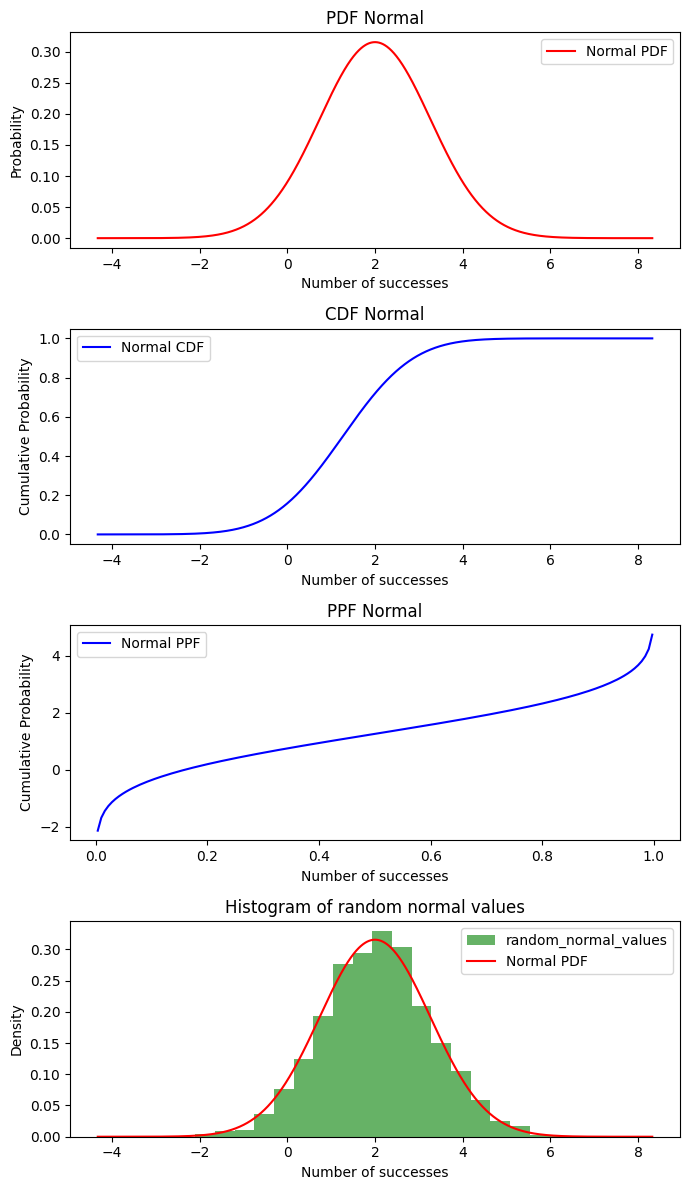

In [22]:
import matplotlib.pyplot as plt

np.random.seed(42)

x_normal = np.linspace(normal_mean - 5 * normal_standard_deviation, normal_mean + 5 * normal_standard_deviation, 2000)
pdf_normal = dnorm(x_normal, mean=normal_mean, std_dev=normal_standard_deviation)

fig, axes = plt.subplots(4, 1, figsize=(7, 12))

axes[0].plot(x_normal, pdf_normal, 'r-', label='Normal PDF')  # PDF of normal distribution
axes[0].set_title('PDF Normal')
axes[0].set_xlabel('Number of successes')
axes[0].set_ylabel('Probability')
axes[0].legend()

axes[1].plot(x_normal, pnorm(x_normal, mean=normal_standard_deviation, std_dev=normal_standard_deviation), 'b-', label='Normal CDF') # CDF Normal
axes[1].set_title('CDF Normal')
axes[1].set_xlabel('Number of successes')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend()

axes[2].plot(x_normal, qnorm(x_normal, mean=normal_standard_deviation, std_dev=normal_standard_deviation), 'b-', label='Normal PPF') # PPF Normal
axes[2].set_title('PPF Normal')
axes[2].set_xlabel('Number of successes')
axes[2].set_ylabel('Cumulative Probability')
axes[2].legend()

axes[3].hist(random_normal_values, bins=20, density=True, alpha=0.6, color='g', label='random_normal_values')
axes[3].plot(x_normal, pdf_normal, 'r-', label='Normal PDF')
axes[3].set_title('Histogram of random normal values')
axes[3].set_xlabel('Number of successes')
axes[3].set_ylabel('Density')
axes[3].legend()

plt.tight_layout()
plt.show()

# Uniform Distribution

In [1]:
# TODO

# Calculates PDF related to this distribution

def dunif(x, a= 0, b= 1):
    result = stats.uniform.pdf(x, loc=a, scale= b-a)

    return result

def punif(q, a= 0, b = 1):
    """
    Calculates the cumulative distribution funtion CDF of the uniform distribution
    """
    result = stats.uniform.cdf(q, loc = a, scale = b-a)

    return result

def qunif(p, a=0, b= 1):
    """
    Calculates the quantile function inverse CDF of the normal distribution
    """
    result = stats.uniform.ppf(p, loc=a, scale=b-a)

    return result

def runif(n, a=0, b= 1):
    """
    Generates random variables from the binomial distribution
    """
    result = stats.uniform.rvs(loc=a, scale=b-a, size = n)

    return result

In [9]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

n = 10
p = 0.2

theorical_mean = n * p
uniform_amp = 2*theorical_mean 
min_value = 0
max_value = uniform_amp


print(f"Probability uniform that it takes the value 2: {dunif(2, a=min_value, b=max_value)}")
print(f"Probability uniform that it will take a value less than 2: {punif(3, a=min_value, b=max_value)}")
print(f"Which value has a cumulative probability of 0.9? {qunif(0.9 , a=min_value, b=max_value)}")
random_unif_values = runif(2000, a=min_value, b=max_value)
print(f"Generate 2000 random values from a normal distribution: {random_unif_values}")

Probability uniform that it takes the value 2: 0.25
Probability uniform that it will take a value less than 2: 0.75
Which value has a cumulative probability of 0.9? 3.6
Generate 2000 random values from a normal distribution: [1.49816048 3.80285723 2.92797577 ... 0.27583207 0.22821888 1.1287483 ]


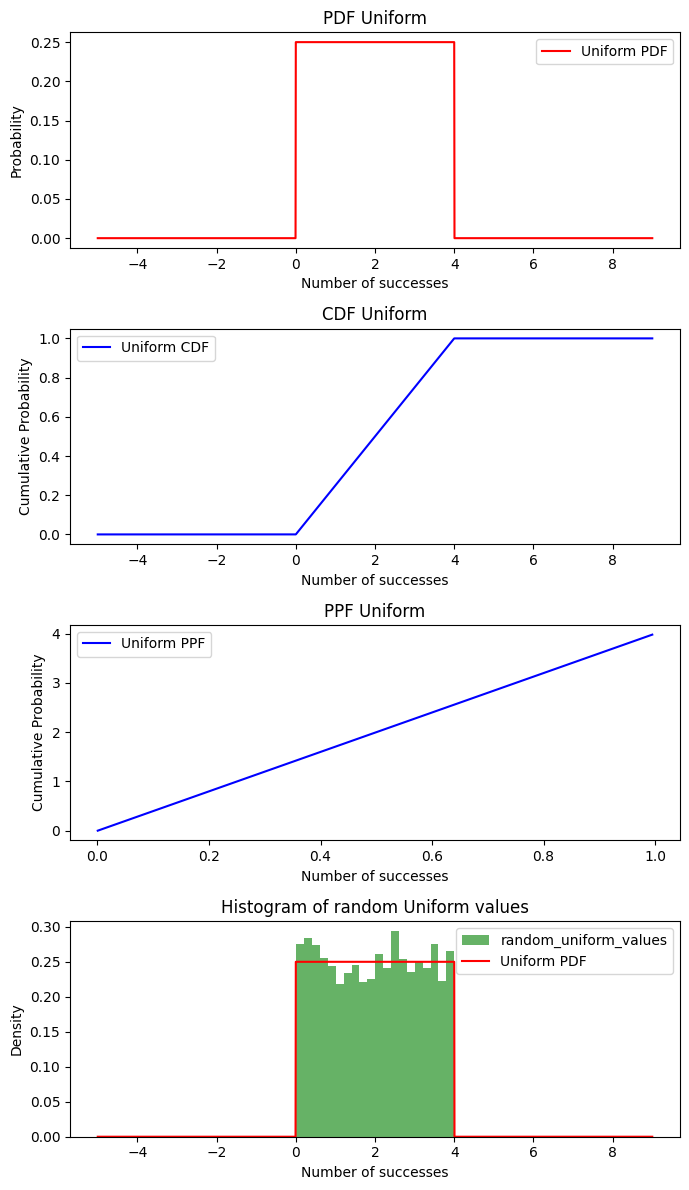

In [8]:
import matplotlib.pyplot as plt

np.random.seed(42)

x_uniform = np.linspace(min_value - 5, max_value + 5 , 2000)
pdf_unif = dunif(x_uniform, a=min_value, b=max_value)

fig, axes = plt.subplots(4, 1, figsize=(7, 12))

axes[0].plot(x_uniform, pdf_unif, 'r-', label='Uniform PDF') 
axes[0].set_title('PDF Uniform')
axes[0].set_xlabel('Number of successes')
axes[0].set_ylabel('Probability')
axes[0].legend()

axes[1].plot(x_uniform, punif(x_uniform, a=min_value, b=max_value), 'b-', label='Uniform CDF') # CDF Uniform
axes[1].set_title('CDF Uniform')
axes[1].set_xlabel('Number of successes')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend()

axes[2].plot(x_uniform, qunif(x_uniform, a=min_value, b=max_value), 'b-', label='Uniform PPF') # PPF Uniform
axes[2].set_title('PPF Uniform')
axes[2].set_xlabel('Number of successes')
axes[2].set_ylabel('Cumulative Probability')
axes[2].legend()

axes[3].hist(random_unif_values, bins=20, density=True, alpha=0.6, color='g', label='random_uniform_values')
axes[3].plot(x_uniform, pdf_unif, 'r-', label='Uniform PDF')
axes[3].set_title('Histogram of random Uniform values')
axes[3].set_xlabel('Number of successes')
axes[3].set_ylabel('Density')
axes[3].legend()

plt.tight_layout()
plt.show()